In [7]:
### Create subset for police individual

import re
import numpy as np
import pandas as pd

df1 = pd.read_csv('2010-2020 OCPF.csv')
#df1 = pd.read_csv('OCPF_Police.csv')
index = []
# Individual
fillter1 = ["Law Enforcement", "Sheriff", "Patrol", "Detective", "Trooper", "Police"] # Occupation
fillter2 = ["Police"] # Employer
for i, row in df1.iterrows():
    valid = False
    for f in fillter1:
        if re.search(f, str(row['Occupation']), flags = re.IGNORECASE) != None:
            valid = True
            break
    for f in fillter2:
        if valid or re.search(f, str(row['Employer']), flags = re.IGNORECASE) != None:
            valid = True
            break
    if valid:
        index.append(True)
    else:
        index.append(False)
df2 = df1[index]
df2.to_csv("./OCPF_Police_Individual.csv")
print(df2.shape)
print(df2.head(5))

(10462, 17)
           Date           Contributor                 Address           City  \
363    1/5/2010      PUDOLSKY, GERALD  2018 WASHINGTON STREET         Canton   
396    1/6/2010     Ainsworth, Gordon             Pine Street     Northfield   
568    1/7/2010  CICCONE, JR, ALLAN L              22 WEST ST  NEWTON CORNER   
951   1/10/2010      LINSKEY, MICHAEL             71 GROVE CR      BRAINTREE   
1255  1/13/2010       Hodgson, Thomas         158 Hathaway Rd      Dartmouth   

     State        Zip                  Occupation  \
363     MA      02021             SPECIAL SHERIFF   
396     MA      01360              Deputy Sheriff   
568     MA  024581326              POLICE OFFICER   
951     MA      02184  BOSTON CITY POLICE OFFICER   
1255    MA      02747                     Sheriff   

                             Employer Principal Officer  Amount  CPF ID  \
363     COMMONWEALTH OF MASSACHUSETTS               NaN   500.0   14188   
396                      Comm OF Mass 

In [11]:
### Create subset for police association/union

index2 = []
# Association/Union
fillter3 = ["Boston School Police Nepba Local 150", "Ma Correction Officers", "MA LAWPAC",\
            "MA State Police Commissioned Officers PAC", "Massachusetts Coalition of Police",\
            "Massachusetts Municipal Police Coalition", "New England Police Benevolent Association",\
            "State Police Assoc of Mass. Pol Action Comm", "MA Correction Officers Federated Union",\
            "State Police Association of Massachusetts"] # Occupation
fillter4 = ["Boston Police"] # Employer
fillter5 = "Union/Association" # Record Type
for i, row in df1.iterrows():
    valid = False
    for f in fillter3:
        if re.search(f, str(row['Contributor']), flags = re.IGNORECASE) != None:
            valid = True
            break
    for f in fillter4:
        if valid or str(row['Contributor']).startswith(f):
            valid = True
            break
    if valid and re.search(fillter5, str(row['Record Type Description']), flags = re.IGNORECASE) != None:
        index2.append(True)
    else:
        index2.append(False)
df3 = df1[index2]
df3.to_csv("./OCPF_Police_Union.csv")
print(df3.shape)
print(df3.head(5))

(310, 17)
            Date                                 Contributor  \
13834  2/24/2010   STATE POLICE ASSOCIATION OF MASSACHUSETTS   
22993  3/10/2010    MASSACHUSETTS MUNICIPAL POLICE COALITION   
25507  3/15/2010  Boston Police Superior Officers Federation   
26829  3/17/2010  Boston Police Superior Officers Federation   
27961  3/18/2010   STATE POLICE ASSOCIATION OF MASSACHUSETTS   

                            Address          City State    Zip Occupation  \
13834         2 MOUNT ROYAL AVE 510   MARLBOROUGH    MA  01752  TREASURER   
22993  153 CARDAVILLE RD, SUITE 210  SOUTHBOROUGH    MA  01722        NaN   
25507           413 Neponset Avenue        Boston    MA  02122        NaN   
26829           413 Neponset Avenue        Boston    MA  02122        NaN   
27961  2 MOUNT ROYAL AVE, SUITE 510      MARLBORO    MA  01752        NaN   

                                            Employer       Principal Officer  \
13834  STATE POLICE ASSOCIATION OF MASSACHUSETTS PAC          

In [1]:
### Import dataset

import re
import numpy as np
import pandas as pd

df1 = pd.read_csv('2010-2020 OCPF.csv')
df2 = pd.read_csv('OCPF_Police_Individual.csv')
df3 = pd.read_csv('OCPF_Police_Union.csv')

In [2]:
### Find cities that received most contribution from police

df4 = pd.concat([df2, df3], axis = 0)

dict_c3 = {}
for i, row in df4.iterrows():
    tmp = 0
    if row['City'] in dict_c3.keys():
        tmp = dict_c3[row['City']]
    tmp += row['Amount']
    dict_c3[row['City']] = tmp
L1 = sorted(dict_c3.items(), key = lambda item: item[1], reverse = True)
print("Top 5 Cities that Received Donation from Police is:")
for i in range(5):
    print(L1[i])

Top 5 Cities that Received Donation from Police is:
('Boston', 278658.61)
('Dorchester', 161473.19)
('Quincy', 95578.9)
('West Roxbury', 81428.03)
('Hyde Park', 68571.0)


In [2]:
### Match CPF ID and Recipient

idlist = df1["CPF ID"].values.tolist()
namelist = df1["Recipient"].values.tolist()
dict0 = {}
tmp = 0
for key in idlist:
    dict0[key] = namelist[tmp]
    tmp += 1
print(dict0)

{95359: 'MA Coalition for Our Communities', 13623: 'Jain, Kamal', 14920: 'Pressley, Ayanna', 15012: 'Cutler, Josh', 13866: 'Webster, Daniel K.', 80840: 'Lawrence Teachers Union Committee on Political Action', 76490: 'Sandwich REPTC', 70199: 'Gloucester DEMCC', 14744: 'Clark, Katherine', 14991: 'Guardia, Anthony', 14542: 'Sandlin, Rosemary', 10315: 'Moore, Richard T.', 14975: 'Day, Michael S.', 14993: 'Dixon, James E.', 15061: 'Brodeur, Paul', 13048: "O'Flaherty, Eugene L.", 12258: 'Flavin, Nancy A.', 80823: 'New England Police Benevolent Association, Inc. Political Action Committee', 12185: 'Jacques, Cheryl Ann', 10403: 'Speliotis, Theodore C.', 15008: 'Wentworth, Jason', 80652: 'Floorcoverers L.U. 2168 PAC', 13249: 'deMacedo, Vinny', 11155: 'Rosenberg, Stanley C.', 13769: 'Perotto, Mike C.', 13951: 'Peisch, Alice Hanlon', 80230: 'Plumbers Union Local #12 PAC', 15009: 'Lucas, David R.', 13833: 'Perry, Jeffrey', 14814: 'Arciero, Jim', 13237: 'Balser, Ruth B.', 14998: 'Barnet, Margot', 1

In [3]:
### Find the top police individual and association/union donors

dict_c1 = {}
max_c1 = 0
top_c1 = ""
for i, row in df2.iterrows():
    tmp = 0
    if row['Contributor'] in dict_c1.keys():
        tmp = dict_c1[row['Contributor']]
    tmp += row['Amount']
    dict_c1[row['Contributor']] = tmp
    if tmp > max_c1:
        max_c1 = tmp
        top_c1 = row['Contributor']
print("Top Donor in Police Individual is: " + top_c1 + ", " + str(max_c1))

dict_c2 = {}
max_c2 = 0
top_c2 = ""
for i, row in df3.iterrows():
    tmp = 0
    if row['Contributor'] in dict_c2.keys():
        tmp = dict_c2[row['Contributor']]
    tmp += row['Amount']
    dict_c2[row['Contributor']] = tmp
    if tmp > max_c2:
        max_c2 = tmp
        top_c2 = row['Contributor']
print("Top Donor in Police Association/Union is: " + top_c2 + ", " + str(max_c2))

Top Donor in Police Individual is: Hunter, Edward, 17175.0
Top Donor in Police Association/Union is: Boston Police Superior Officers Federation, 11450.0


In [4]:
top_donor = {}
a = {}
for key in idlist:
    top_donor[key] = ''
    a[key] = 0
for i, row in df2.iterrows():
    if a[row['CPF ID']] < row['Amount']:
        top_donor[row['CPF ID']] = row['Contributor']
        a[row['CPF ID']] = row['Amount']
for key in top_donor.keys():
    if a[key] > 0:
        print(dict0[key] + ': ' + str(top_donor[key]) + ', ' + str(a[key]))

Pressley, Ayanna: Hosein, Haseeb, 500.0
Cutler, Josh: Bayramshian, Richard, 25.0
Webster, Daniel K.: Constantine, Tom, 250.0
Sandwich REPTC: Neal, David, 100.0
Clark, Katherine: Machado, James, 200.0
Sandlin, Rosemary: McCullough, John, 250.0
Moore, Richard T.: Patterson, David, 250.0
Brodeur, Paul: Pullman, Dana, 200.0
Speliotis, Theodore C.: Daly, Andrew, 300.0
deMacedo, Vinny: Cummings, James, 500.0
Rosenberg, Stanley C.: Babbin, Timothy G, 1000.0
Lucas, David R.: McSorley, Joseph, 100.0
Balser, Ruth B.: CICCONE, JR, ALLAN L, 100.0
Turner, Cleon H.: Almonte, Michael, 100.0
Balzotti, Linda M.: Bonanca, Paul , 500.0
Evangelidis, Lewis G.: Bourget, Janet, 1000.0
Lantigua, William: Flores Jr., Jose A., 500.0
Knapik, Michael R.: Scott, Anthony, 100.0
Fallon, Christopher G.: Mackay, George, 250.0
Chapter 25 Associated the Nat'l DRIVE PAC of the Int'l Brotherhood of Teamsters: Williams, Brian , 25.0
MA Coalition of Nurse Practitioners PAC: Greenstein, Zelma, 10.0
Martinez, Sandra: Barkdoll

In [7]:
top_donor_2 = {}
a2 = {}
for key in idlist:
    top_donor_2[key] = ''
    a2[key] = 0
for i, row in df3.iterrows():
    if a2[row['CPF ID']] < row['Amount']:
        top_donor_2[row['CPF ID']] = row['Contributor']
        a2[row['CPF ID']] = row['Amount']
for key in top_donor_2.keys():
    if a2[key] > 0:
        print(dict0[key] + ': ' + str(top_donor_2[key]) + ', ' + str(a2[key]))

Moore, Richard T.: Massachusetts Coalition Of Police AFL-CIO, I.U.P.A, 250.0
Day, Michael S.: Boston Police Patrolmen's Association, 500.0
New England Police Benevolent Association, Inc. Political Action Committee: Boston School Police NEPBA Local 150, 585.0
Rosenberg, Stanley C.: NEW ENGLAND POLICE BENEVOLENT ASSOCIATION, 500.0
Arciero, Jim: State Police Association of Massachusetts, 500.0
Fallon, Christopher G.: Massachusetts Coalition of Police AFL-CIo, I.U.P.A., 500.0
Joyce, Brian A.: Massachusetts Municipal Police Coalition, 100.0
Murray, Therese: NEW ENGLAND POLICE BENEVOLENT ASSOCIATION, 250.0
Patrick, Deval L.: STATE POLICE ASSOCIATION OF MASSACHUSETTS, 500.0
Murphy, Charles A.: STATE POLICE ASSOCIATION OF MASSACHUSETTS, 500.0
Petruccelli, Anthony W.: STATE POLICE ASSOCIATION OF MASSACHUSETTS PAC, 500.0
Hill, Bradford R.: Massachusetts Coalition of Police, Inc, 100.0
Committee for a Democratic House Political Action Committee: State Police Association of Massachusetts, 1500.0
T

In [3]:
### Research and visualization on specific politicians - Group 1

list1 = [14454, 14571, 11916, 15444, 15901, 15729]
dict1 = {}
for key in list1:
    dict1[key] = 0
for i, row in df1.iterrows():
    if row['CPF ID'] in dict1.keys():
        dict1[row['CPF ID']] += row['Amount']
print(dict1)

dict2 = {}
for key in list1:
    dict2[key] = 0
for i, row in df2.iterrows():
    if row['CPF ID'] in dict2.keys():
        dict2[row['CPF ID']] += row['Amount']
print(dict2)

dict3 = {}
for key in list1:
    dict3[key] = 0
for i, row in df3.iterrows():
    if row['CPF ID'] in dict3.keys():
        dict3[row['CPF ID']] += row['Amount']
print(dict3)

df4 = pd.concat([df2, df3], axis = 0)
dict4 = {}
for key in list1:
    dict4[key] = 0
for i, row in df4.iterrows():
    if row['CPF ID'] in dict4.keys():
        dict4[row['CPF ID']] += row['Amount']
print(dict4)

{14454: 609958.86, 14571: 414080.43999999994, 11916: 670221.8699999999, 15444: 495189.0, 15901: 52975.86, 15729: 303269.97}
{14454: 200.0, 14571: 200.0, 11916: 3250.0, 15444: 125.0, 15901: 0, 15729: 15375.0}
{14454: 0, 14571: 0, 11916: 0, 15444: 0, 15901: 0, 15729: 0}
{14454: 200.0, 14571: 200.0, 11916: 3250.0, 15444: 125.0, 15901: 0, 15729: 15375.0}


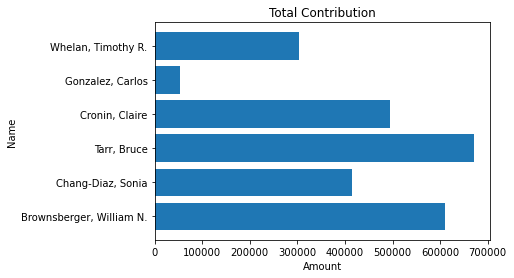

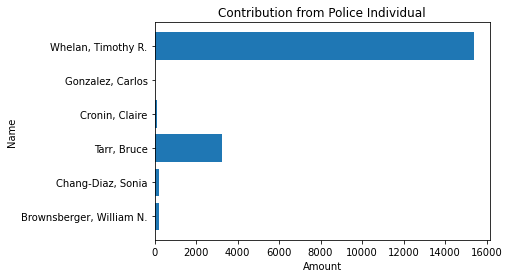

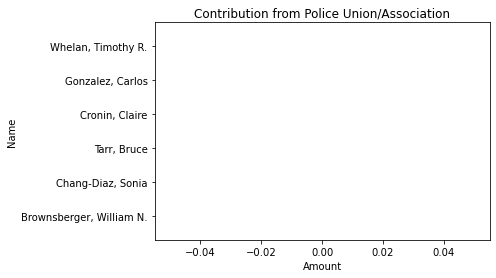

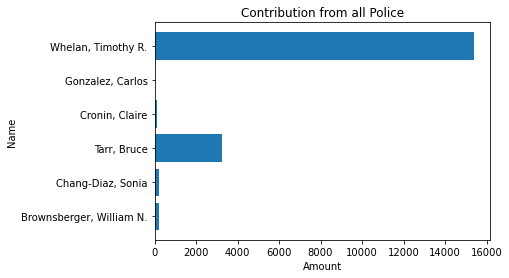

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
b = ax.barh(range(len(dict1)), dict1.values())
ax.set_yticks(range(len(dict1)))
ax.set_yticklabels(dict0[k] for k in dict1.keys())
plt.title("Total Contribution")
plt.xlabel("Amount")
plt.ylabel("Name")
plt.show()

fig, ax = plt.subplots()
b = ax.barh(range(len(dict2)), dict2.values())
ax.set_yticks(range(len(dict2)))
ax.set_yticklabels(dict0[k] for k in dict2.keys())
plt.title("Contribution from Police Individual")
plt.xlabel("Amount")
plt.ylabel("Name")
plt.show()

fig, ax = plt.subplots()
b = ax.barh(range(len(dict3)), dict3.values())
ax.set_yticks(range(len(dict3)))
ax.set_yticklabels(dict0[k] for k in dict3.keys())
plt.title("Contribution from Police Union/Association")
plt.xlabel("Amount")
plt.ylabel("Name")
plt.show()

fig, ax = plt.subplots()
b = ax.barh(range(len(dict4)), dict4.values())
ax.set_yticks(range(len(dict4)))
ax.set_yticklabels(dict0[k] for k in dict4.keys())
plt.title("Contribution from all Police")
plt.xlabel("Amount")
plt.ylabel("Name")
plt.show()

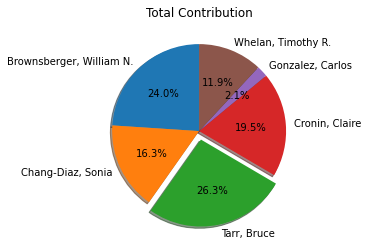

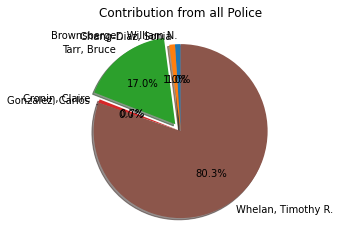

In [7]:
indic = []

for value in dict1.values():
    if value == max(dict1.values()):
        indic.append(0.1)
    else:
        indic.append(0)

plt.pie(
    dict1.values(),
    labels = [dict0[k] for k in dict1.keys()],
    startangle = 90,
    shadow = True,
    explode = tuple(indic),
    autopct = '%1.1f%%'
)
plt.title("Total Contribution")
plt.show()

indic2 = []

for value in dict4.values():
    if value == max(dict4.values()):
        indic2.append(0.1)
    else:
        indic2.append(0)

plt.pie(
    dict4.values(),
    labels = [dict0[k] for k in dict4.keys()],
    startangle = 90,
    shadow = True,
    explode = tuple(indic),
    autopct = '%1.1f%%'
)
plt.title("Contribution from all Police")
plt.show()

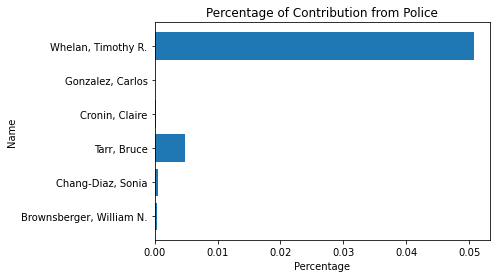

In [30]:
### Percentage of police contribution for this group

dict9 = dict4.copy()
for key in dict9.keys():
    dict9[key] /= dict1[key]

fig, ax = plt.subplots()
b = ax.barh(range(len(dict9)), dict9.values())
ax.set_yticks(range(len(dict9)))
ax.set_yticklabels(dict0[k] for k in dict9.keys())
plt.title("Percentage of Contribution from Police")
plt.xlabel("Percentage")
plt.ylabel("Name")
plt.show()

In [10]:
### Top donors of this group

top_donor_3 = {}
a3 = {}
for key in list1:
    top_donor_3[key] = ''
    a3[key] = 0
for i, row in df2.iterrows():
    if row['CPF ID'] in a3.keys():
        if a3[row['CPF ID']] < row['Amount']:
            top_donor_3[row['CPF ID']] = row['Contributor']
            a3[row['CPF ID']] = row['Amount']
for key in top_donor_3.keys():
    if a3[key] > 0:
        print(dict0[key] + ': ' + str(top_donor_3[key]) + ', ' + str(a3[key]))

Brownsberger, William N.: MacIsaac, James, 200.0
Chang-Diaz, Sonia: Tompkins, Steve, 100.0
Tarr, Bruce: Paglia, Attilio, 500.0
Cronin, Claire: Machado, James M., 125.0
Whelan, Timothy R.: Heywood, Daralyn, 500.0


In [11]:
top_donor_4 = {}
a4 = {}
for key in list1:
    top_donor_4[key] = ''
    a4[key] = 0
for i, row in df3.iterrows():
    if row['CPF ID'] in a4.keys():
        if a4[row['CPF ID']] < row['Amount']:
            top_donor_4[row['CPF ID']] = row['Contributor']
            a4[row['CPF ID']] = row['Amount']
for key in top_donor_4.keys():
    if a4[key] > 0:
        print(dict0[key] + ': ' + str(top_donor_4[key]) + ', ' + str(a4[key]))

In [4]:
### Research and visualization on specific politicians - a legislation voting against police
### People who voted for NO

list2 = [14543, 13284, 17028, 15976, 17505, 15977, 15123, 15066, 15177, 15158, 13597, 11859, 12563, 10598, 12600, 16905, 16878, \
        16962, 17016, 15297, 15107, 15577, 16293, 14410, 13724, 13338, 11102, 12889, 17043, 12242, 10389, 15093, 15060, 13645, \
        16291, 15488, 12534, 12623, 13455, 13579, 13110, 14561, 15775, 14831, 14535, 15089, 15904, 17361, 17372, 15706, 15011, \
        15055, 15777, 14990, 14265, 15041, 15930, 13568, 15527, 14232, 15809, 15422, 15779, 15806, 16927, 14168, 15877, 16980, \
        15025, 15729, 15174, 15463]
#There're 2 Cahills (15976 and 17505), 2 Goldens (10598, 12600), 3 Dooleys (17361, 17372, 15706), 2 Harringtons (15777, 14990),
#2 Kanes (15930, 13568)

dict5 = {}
for key in list2:
    dict5[key] = 0
for i, row in df1.iterrows():
    if row['CPF ID'] in dict5.keys():
        dict5[row['CPF ID']] += row['Amount']
print(dict5)

dict6 = {}
for key in list2:
    dict6[key] = 0
for i, row in df2.iterrows():
    if row['CPF ID'] in dict6.keys():
        dict6[row['CPF ID']] += row['Amount']
print(dict6)

dict7 = {}
for key in list2:
    dict7[key] = 0
for i, row in df3.iterrows():
    if row['CPF ID'] in dict7.keys():
        dict7[row['CPF ID']] += row['Amount']
print(dict7)

dict8 = {}
for key in list2:
    dict8[key] = 0
for i, row in df4.iterrows():
    if row['CPF ID'] in dict8.keys():
        dict8[row['CPF ID']] += row['Amount']
print(dict8)

{14543: 136080.98, 13284: 278224.5, 17028: 174213.75999999998, 15976: 144195.03000000003, 17505: 1005.0, 15977: 116758.45, 15123: 528055.24, 15066: 412387.85000000003, 15177: 378428.8, 15158: 305064.56, 13597: 408792.10000000003, 11859: 108793.23999999999, 12563: 126571.0, 10598: 1506.4900000000002, 12600: 588711.24, 16905: 86916.0, 16878: 55043.36, 16962: 177335.0, 17016: 75269.45, 15297: 282226.28, 15107: 241599.0899999999, 15577: 200258.0, 16293: 286984.29000000004, 14410: 159519.52000000002, 13724: 324426.91, 13338: 553970.04, 11102: 366658.6399999996, 12889: 523938.86, 17043: 26800.0, 12242: 330645.30000000005, 10389: 182108.09000000003, 15093: 443377.16000000003, 15060: 370417.4799999999, 13645: 406009.57, 16291: 131644.24, 15488: 158874.88999999998, 12534: 561013.2400000001, 12623: 193217.04, 13455: 120204.96999999999, 13579: 173530.27000000002, 13110: 171366.96000000005, 14561: 110652.96, 15775: 74835.82, 14831: 180258.18, 14535: 351478.0, 15089: 264432.02, 15904: 209719.4, 173

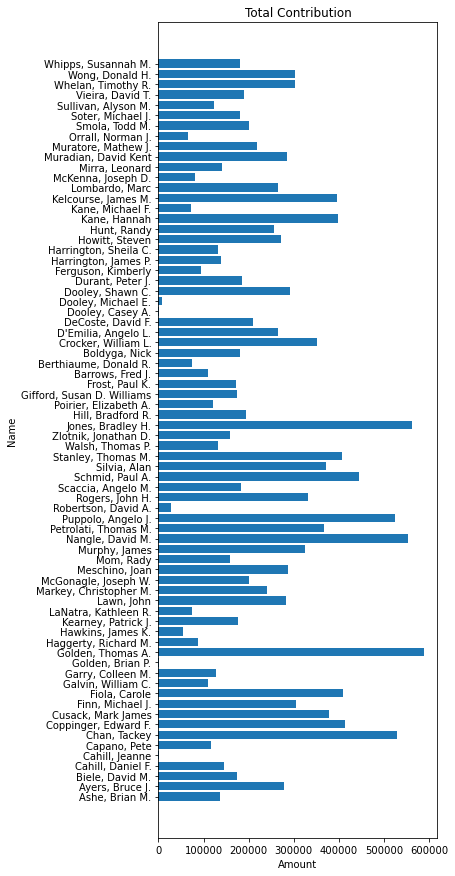

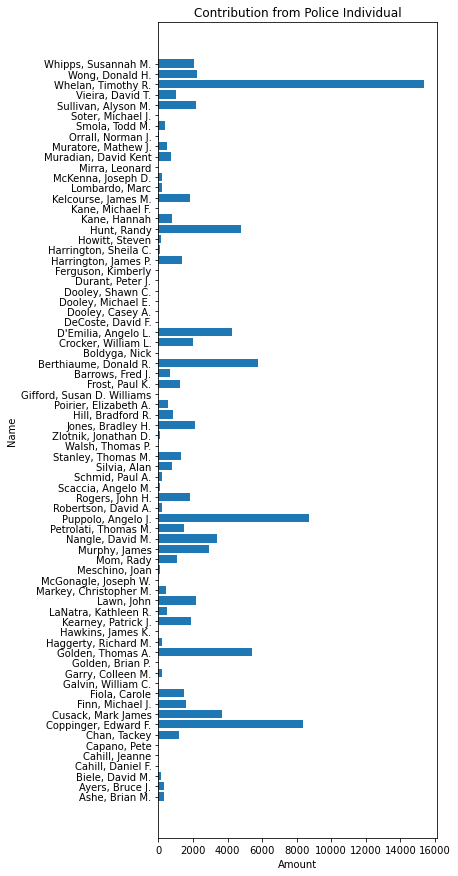

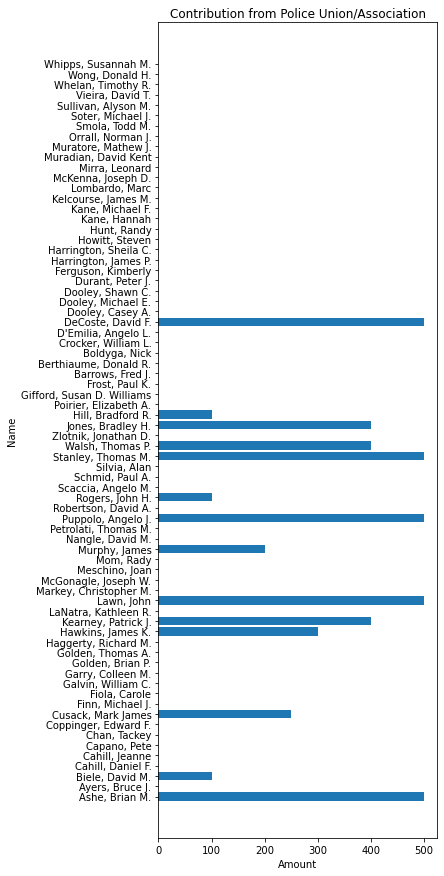

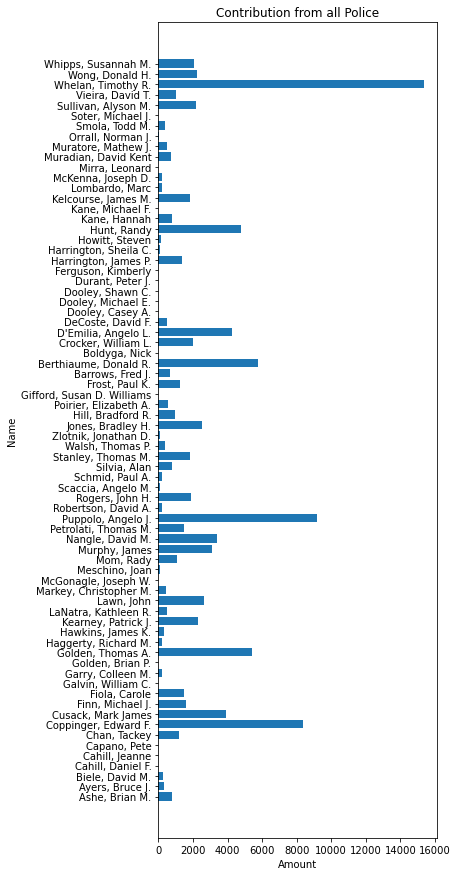

In [32]:
fig, ax = plt.subplots(figsize = (5, 15))
b = ax.barh(range(len(dict5)), dict5.values())
ax.set_yticks(range(len(dict5)))
ax.set_yticklabels(dict0[k] for k in dict5.keys())
plt.title("Total Contribution")
plt.xlabel("Amount")
plt.ylabel("Name")
plt.show()

fig, ax = plt.subplots(figsize = (5, 15))
b = ax.barh(range(len(dict6)), dict6.values())
ax.set_yticks(range(len(dict6)))
ax.set_yticklabels(dict0[k] for k in dict6.keys())
plt.title("Contribution from Police Individual")
plt.xlabel("Amount")
plt.ylabel("Name")
plt.show()

fig, ax = plt.subplots(figsize = (5, 15))
b = ax.barh(range(len(dict7)), dict7.values())
ax.set_yticks(range(len(dict7)))
ax.set_yticklabels(dict0[k] for k in dict7.keys())
plt.title("Contribution from Police Union/Association")
plt.xlabel("Amount")
plt.ylabel("Name")
plt.show()

fig, ax = plt.subplots(figsize = (5, 15))
b = ax.barh(range(len(dict8)), dict8.values())
ax.set_yticks(range(len(dict8)))
ax.set_yticklabels(dict0[k] for k in dict8.keys())
plt.title("Contribution from all Police")
plt.xlabel("Amount")
plt.ylabel("Name")
plt.show()

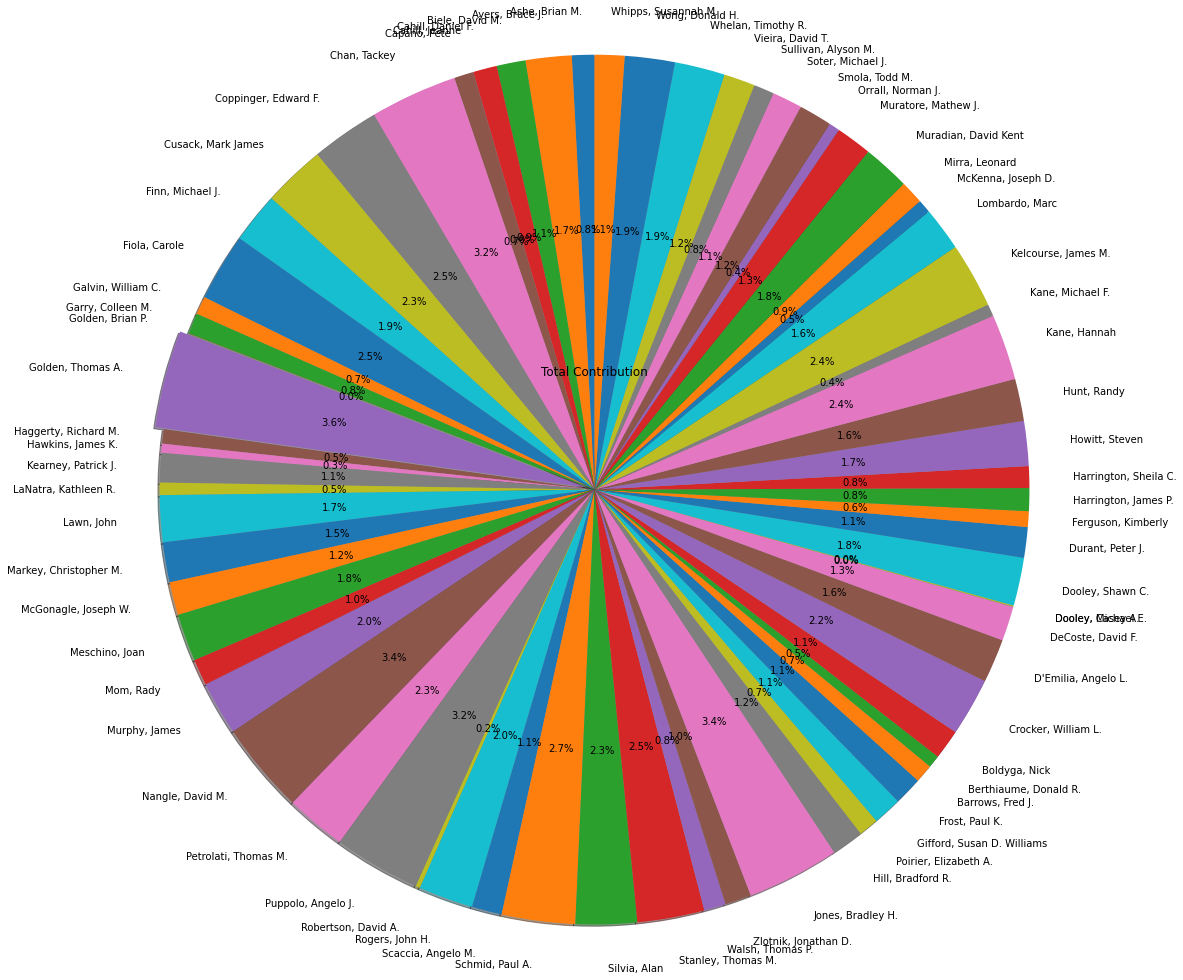

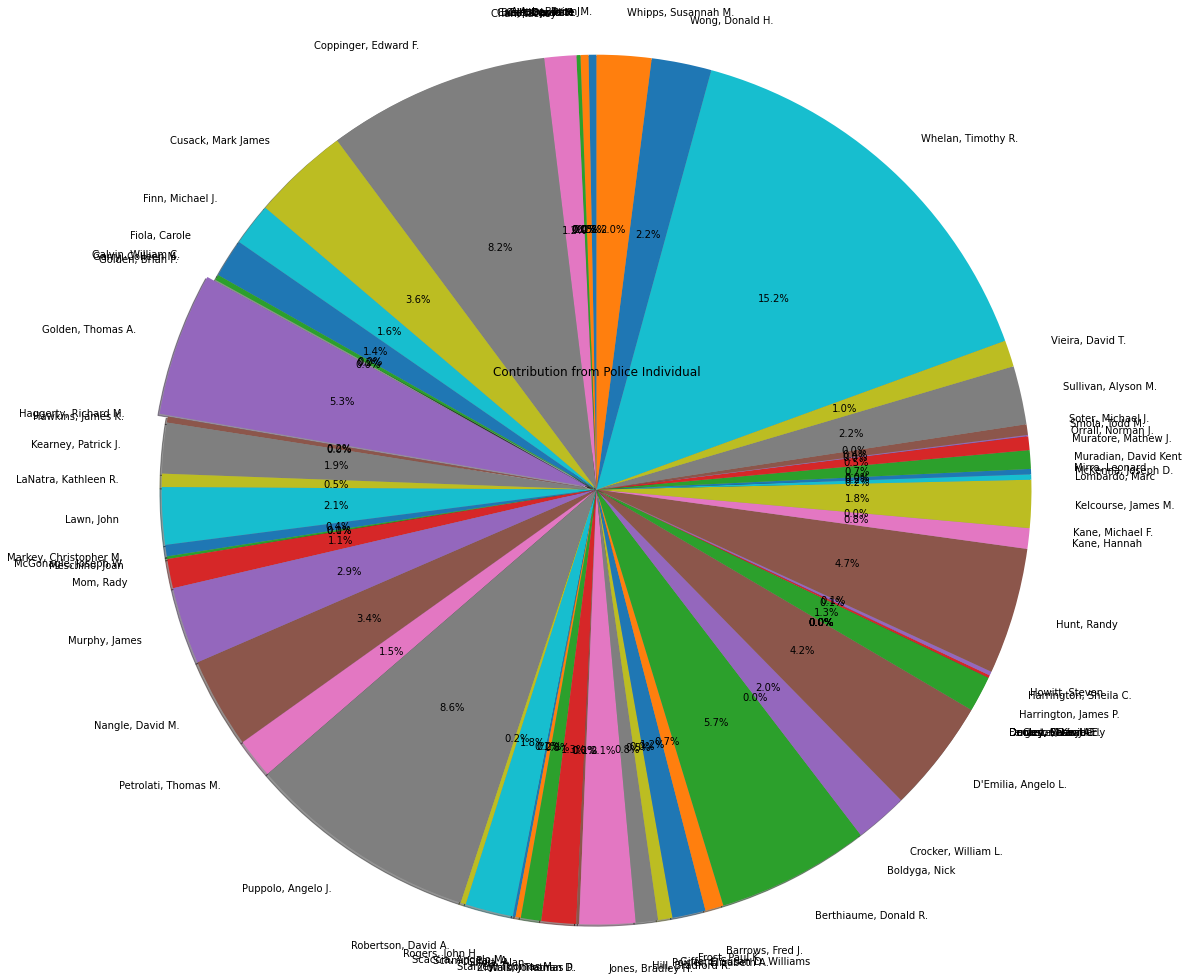

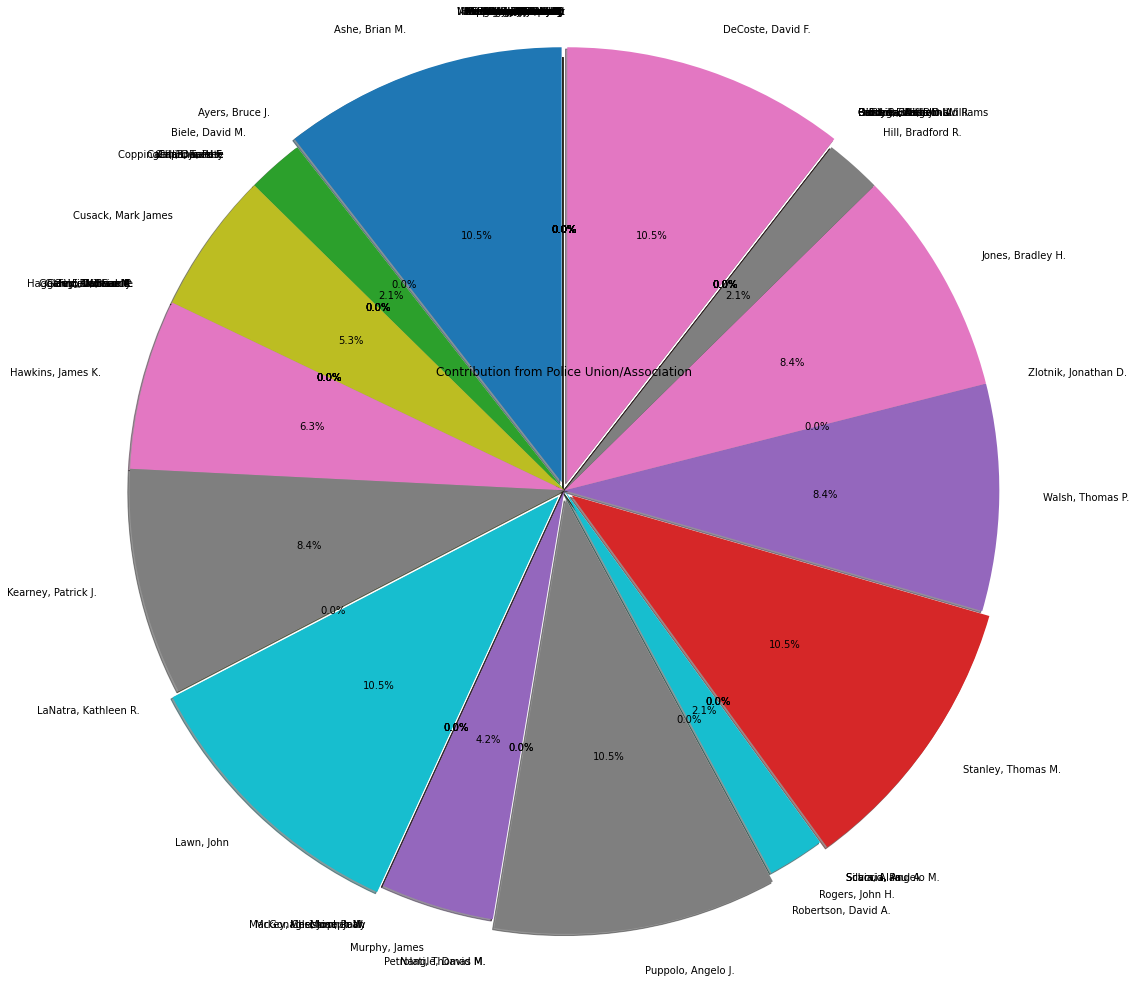

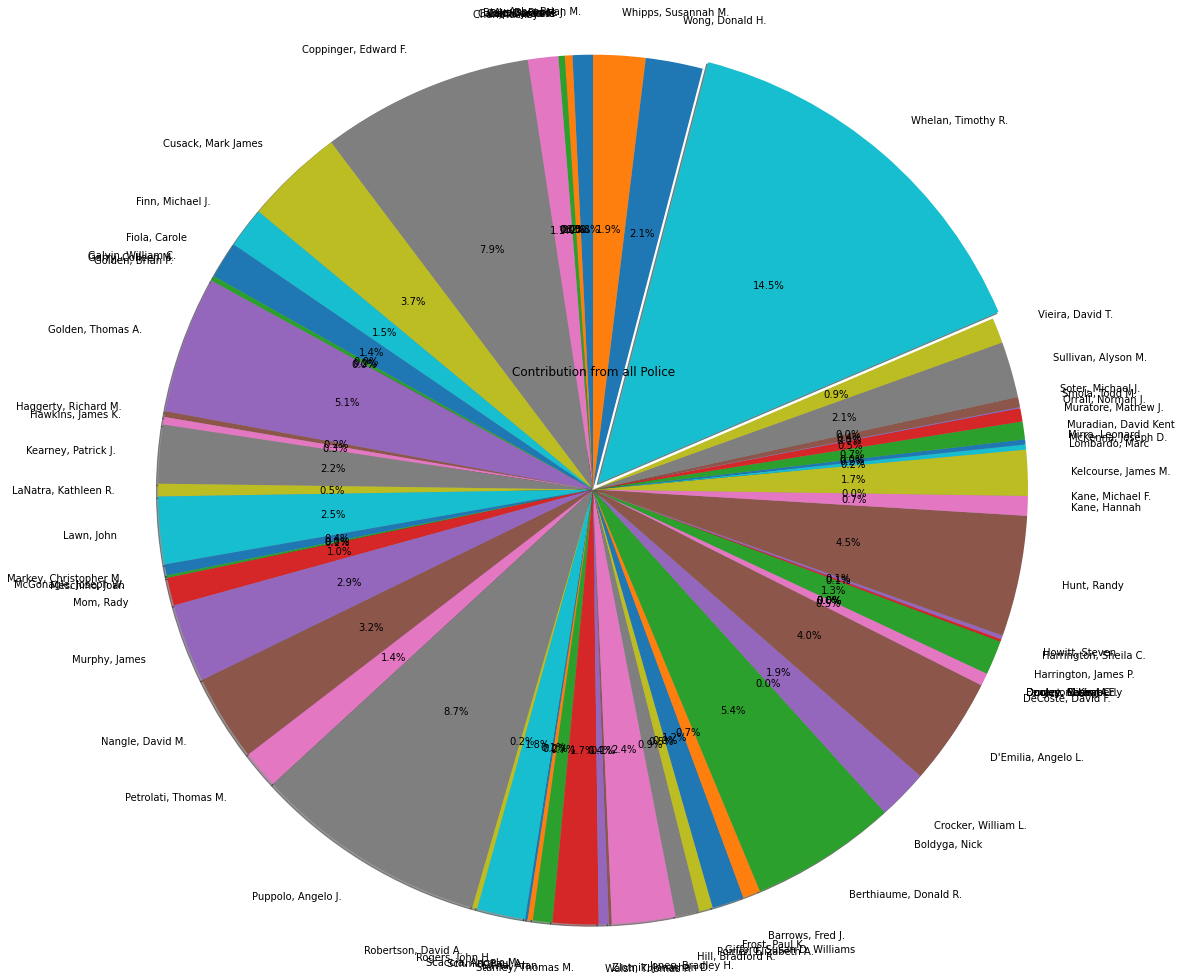

In [33]:
indic = []
for value in dict5.values():
    if value == max(dict5.values()):
        indic.append(0.1)
    else:
        indic.append(0)
plt.pie(
    dict5.values(),
    radius = 5,
    labels = [dict0[k] for k in dict5.keys()],
    startangle = 90,
    shadow = True,
    explode = tuple(indic),
    autopct = '%1.1f%%'
)
plt.title("Total Contribution")
plt.show()

indic2 = []
for value in dict6.values():
    if value == max(dict6.values()):
        indic2.append(0.1)
    else:
        indic2.append(0)
plt.pie(
    dict6.values(),
    radius = 5,
    labels = [dict0[k] for k in dict6.keys()],
    startangle = 90,
    shadow = True,
    explode = tuple(indic),
    autopct = '%1.1f%%'
)
plt.title("Contribution from Police Individual")
plt.show()

indic3 = []
for value in dict7.values():
    if value == max(dict7.values()):
        indic3.append(0.1)
    else:
        indic3.append(0)
plt.pie(
    dict7.values(),
    radius = 5,
    labels = [dict0[k] for k in dict7.keys()],
    startangle = 90,
    shadow = True,
    explode = tuple(indic3),
    autopct = '%1.1f%%'
)
plt.title("Contribution from Police Union/Association")
plt.show()

indic4 = []
for value in dict8.values():
    if value == max(dict8.values()):
        indic4.append(0.1)
    else:
        indic4.append(0)

plt.pie(
    dict8.values(),
    radius = 5,
    labels = [dict0[k] for k in dict8.keys()],
    startangle = 90,
    shadow = True,
    explode = tuple(indic4),
    autopct = '%1.1f%%'
)
plt.title("Contribution from all Police")
plt.show()

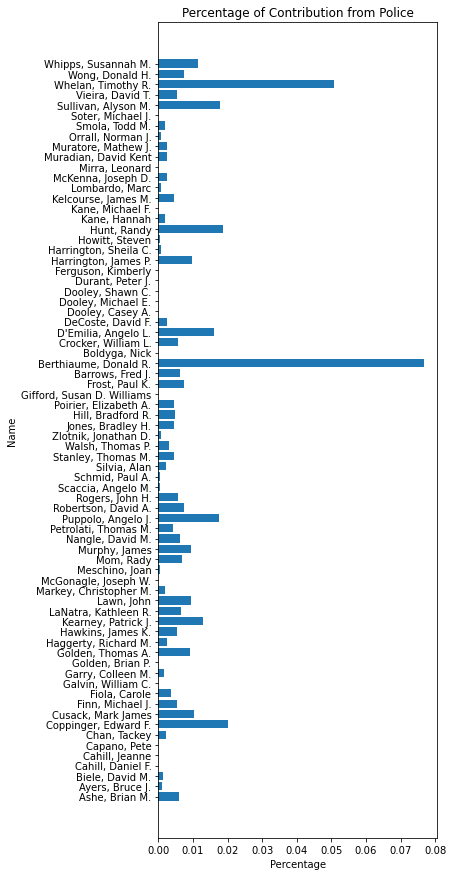

In [34]:
### Percentage of police contribution for people who voted for NO

dict10 = dict8.copy()
for key in dict10.keys():
    dict10[key] /= dict5[key]

fig, ax = plt.subplots(figsize = (5, 15))
b = ax.barh(range(len(dict10)), dict10.values())
ax.set_yticks(range(len(dict10)))
ax.set_yticklabels(dict0[k] for k in dict10.keys())
plt.title("Percentage of Contribution from Police")
plt.xlabel("Percentage")
plt.ylabel("Name")
plt.show()

In [13]:
### Top donors of people who voted for NO

top_donor_5 = {}
a5 = {}
for key in list2:
    top_donor_5[key] = ''
    a5[key] = 0
for i, row in df2.iterrows():
    if row['CPF ID'] in a5.keys():
        if a5[row['CPF ID']] < row['Amount']:
            top_donor_5[row['CPF ID']] = row['Contributor']
            a5[row['CPF ID']] = row['Amount']
for key in top_donor_5.keys():
    if a5[key] > 0:
        print(dict0[key] + ': ' + str(top_donor_5[key]) + ', ' + str(a5[key]))

Ashe, Brian M.: Santaniello, Vincent, 300.0
Ayers, Bruce J.: LINSKEY, MICHAEL, 100.0
Biele, David M.: Cox, David F, 100.0
Chan, Tackey: Jacobs, Walter, 200.0
Coppinger, Edward F.: Boulger, Michael, 500.0
Cusack, Mark James: McDonough, Richard B., 500.0
Finn, Michael J.: O'Brien, Daniel, 250.0
Fiola, Carole: Cullen, Charles J, 250.0
Garry, Colleen M.: Machado, James, 200.0
Golden, Thomas A.: Finneral, Christopher, 500.0
Haggerty, Richard M.: Duffy, Arthur, 200.0
Kearney, Patrick J.: Glynn, Thomas, 500.0
LaNatra, Kathleen R.: Mazzola, Douglas, 500.0
Lawn, John: Lawn, Michael P., 300.0
Markey, Christopher M.: Fontaine, Lauren, 200.0
Meschino, Joan: LaNatra, Michael, 100.0
Mom, Rady: MALDONADO, FRANCISCO, 200.0
Murphy, James: O'Toole, John E., 500.0
Nangle, David M.: Fleming, Thomas A., 400.0
Petrolati, Thomas M.: Capen II, James E., 500.0
Puppolo, Angelo J.: Babbin, Timothy, 500.0
Robertson, David A.: Gaynor, Scott P, 200.0
Rogers, John H.: Pullman, Dana, 250.0
Scaccia, Angelo M.: Knecht,

In [14]:
top_donor_6 = {}
a6 = {}
for key in list2:
    top_donor_6[key] = ''
    a6[key] = 0
for i, row in df3.iterrows():
    if row['CPF ID'] in a6.keys():
        if a6[row['CPF ID']] < row['Amount']:
            top_donor_6[row['CPF ID']] = row['Contributor']
            a6[row['CPF ID']] = row['Amount']
for key in top_donor_6.keys():
    if a6[key] > 0:
        print(dict0[key] + ': ' + str(top_donor_6[key]) + ', ' + str(a6[key]))

Ashe, Brian M.: State Police Association of Massachusetts, 500.0
Biele, David M.: Massachusetts Coalition of Police Inc, 100.0
Cusack, Mark James: Massachusetts Coalition of Police AFL-CIO, IUPA, 250.0
Hawkins, James K.: Massachusetts Coalition of Police, 200.0
Kearney, Patrick J.: Massachusetts Coalition of Police Inc, 200.0
Lawn, John: Boston Police Patrolman's Ass Pac #15297, 500.0
Murphy, James: Massachusetts Coalition of Police, 200.0
Puppolo, Angelo J.: Boston Police Patrolmens Assoc. Pol Action Comm., 500.0
Rogers, John H.: Boston Police Superior Officers Federation, 100.0
Stanley, Thomas M.: Massachusetts Coalition of Police, 500.0
Walsh, Thomas P.: Massachusetts Coalition of Police Inc., 250.0
Jones, Bradley H.: Boston Police Superior Officers Federation, 100.0
Hill, Bradford R.: Massachusetts Coalition of Police, Inc, 100.0
DeCoste, David F.: Boston Police Patrolmens Assoc. Pol Action Comm., 500.0


In [5]:
### People who voted for YES

list3 = [12122, 13627, 12103, 13651, 12650, 14814, 13237, 15839, 16235, 16942, 11119, 14466, 16930, 16298, 16513, 15470, 15444, 15621, \
        15012, 14975, 13736, 14593, 17413, 16971, 15637, 16441, 15820, 14746, 14743, 16694, 15376, 16407, 14472, 14757, 14763, 15057, \
        15742, 15901, 15554, 16894, 14796, 16310, 14881, 16836, 16366, 14770, 15063, 10595, 15721, 11709, 14957, 12719, 16867, 16324, \
        13431, 17408, 15581, 15934, 14681, 13232, 15051, 14680, 14902, 16991, 16987, 15498, 16478, 12832, 16891, 14668, 15015, 14208, \
        13951, 12730, 14444, 17035, 15483, 15490, 15544, 16967, 16919, 17439, 10403, 11466, 13785, 15821, 16408, 15829, 16742, 15533, \
        15755, 16893, 12894]
# There're 2 Fernandes (16407, 14472)
# No idea about Mr Speaker

dict13 = {}
for key in list3:
    dict13[key] = 0
for i, row in df1.iterrows():
    if row['CPF ID'] in dict13.keys():
        dict13[row['CPF ID']] += row['Amount']
print(dict13)

dict14 = {}
for key in list3:
    dict14[key] = 0
for i, row in df2.iterrows():
    if row['CPF ID'] in dict14.keys():
        dict14[row['CPF ID']] += row['Amount']
print(dict14)

dict15 = {}
for key in list3:
    dict15[key] = 0
for i, row in df3.iterrows():
    if row['CPF ID'] in dict15.keys():
        dict15[row['CPF ID']] += row['Amount']
print(dict15)

dict16 = {}
for key in list3:
    dict16[key] = 0
for i, row in df4.iterrows():
    if row['CPF ID'] in dict16.keys():
        dict16[row['CPF ID']] += row['Amount']
print(dict16)

{12122: 972575.06, 13627: 421287.4599999998, 12103: 498826.96000000014, 13651: 684334.9399999998, 12650: 756965.9699999999, 14814: 376280.48, 13237: 182406.22999999992, 15839: 244911.72000000003, 16235: 95780.37, 16942: 67826.61, 11119: 424058.35000000003, 14466: 150810.16210000002, 16930: 38562.11, 16298: 124068.43, 16513: 183334.24, 15470: 255315.18999999994, 15444: 495189.0, 15621: 485126.72000000003, 15012: 490229.75999999995, 14975: 606508.6299999999, 13736: 512761.68, 14593: 195059.02000000002, 17413: 30447.48, 16971: 66928.71, 15637: 208216.27999999997, 16441: 94668.56, 15820: 91931.71, 14746: 140874.77, 14743: 139618.88999999998, 16694: 192769.66, 15376: 148701.94, 16407: 133803.1, 14472: 56783.24, 14757: 465661.1999999999, 14763: 179235.81999999998, 15057: 455869.94000000035, 15742: 59208.36, 15901: 52975.86, 15554: 233894.08000000002, 16894: 96924.95000000001, 14796: 186521.03, 16310: 82441.82999999999, 14881: 123278.30999999998, 16836: 49500.69, 16366: 94880.56999999996, 147

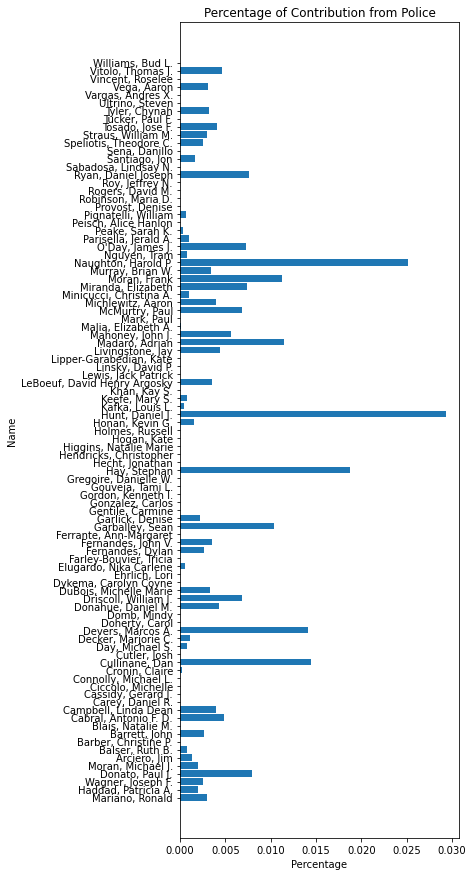

In [36]:
import matplotlib.pyplot as plt

dict17 = dict16.copy()
for key in dict17.keys():
    dict17[key] /= dict13[key]

fig, ax = plt.subplots(figsize = (5, 15))
b = ax.barh(range(len(dict17)), dict17.values())
ax.set_yticks(range(len(dict17)))
ax.set_yticklabels(dict0[k] for k in dict17.keys())
plt.title("Percentage of Contribution from Police")
plt.xlabel("Percentage")
plt.ylabel("Name")
plt.show()

In [8]:
### Metrics

cnt1_1 = 0
cnt1_2 = 0
cnt2_1 = 0
cnt2_2 = 0
cnt3_1 = 0
cnt3_2 = 0
cnt4_1 = 0
cnt4_2 = 0
for key in dict13.keys():
    cnt1_1 += dict13[key]
    cnt2_1 += dict14[key]
    cnt3_1 += dict15[key]
    cnt4_1 += dict16[key]
for key in dict5.keys():
    cnt1_2 += dict5[key]
    cnt2_2 += dict6[key]
    cnt3_2 += dict7[key]
    cnt4_2 += dict8[key]
print('Percentage of Legislators vote for YES: ' + str(len(list3) / (len(list2) + len(list3))))
print('Percentage of Legislators vote for NO: ' + str(len(list2) / (len(list2) + len(list3))))
print('Average - Total: ' + str((cnt1_1 + cnt1_2) / (len(list2) + len(list3))))
print('Average of Legislators vote for YES - Total: ' + str(cnt1_1 / len(list3)))
print('Average of Legislators vote for NO - Total: ' + str(cnt1_2 / len(list2)))
print('Average - Police Individual: ' + str((cnt2_1 + cnt2_2) / (len(list2) + len(list3))))
print('Average of Legislators vote for YES - Police Individual: ' + str(cnt2_1 / len(list3)))
print('Average of Legislators vote for NO - Police Individual: ' + str(cnt2_2 / len(list2)))
print('Average - Police Union/Association: ' + str((cnt3_1 + cnt3_2) / (len(list2) + len(list3))))
print('Average of Legislators vote for YES - Police Union/Association: ' + str(cnt3_1 / len(list3)))
print('Average of Legislators vote for NO - Police Union/Association: ' + str(cnt3_2 / len(list2)))
print('Average - All Police: ' + str((cnt4_1 + cnt4_2) / (len(list2) + len(list3))))
print('Average of Legislators vote for YES - All Police: ' + str(cnt4_1 / len(list3)))
print('Average of Legislators vote for NO - All Police: ' + str(cnt4_2 / len(list2)))
print('Percentage of Contribution from Police - Legislators vote for YES: ' + str(cnt4_1 / cnt1_1))
print('Percentage of Contribution from Police - Legislators vote for NO: ' + str(cnt4_2 / cnt1_2))
print()
print('Weighted average of Legislators vote for YES - Total: ' + str(len(list3) / (len(list2) + len(list3)) * cnt1_1))
print('Weighted average of Legislators vote for YES - Police Individual: ' + str(len(list3) / (len(list2) + len(list3)) * cnt2_1))
print('Weighted average of Legislators vote for YES - Police Union/Association: ' + str(len(list3) / (len(list2) + len(list3)) * cnt3_1))
print('Weighted average of Legislators vote for YES - All Police: ' + str(len(list3) / (len(list2) + len(list3)) * cnt4_1))
print('Weighted average of Legislators vote for NO - Total: ' + str(len(list2) / (len(list2) + len(list3)) * cnt1_2))
print('Weighted average of Legislators vote for NO - Police Individual: ' + str(len(list2) / (len(list2) + len(list3)) * cnt2_2))
print('Weighted average of Legislators vote for NO - Police Union/Association: ' + str(len(list2) / (len(list2) + len(list3)) * cnt3_2))
print('Weighted average of Legislators vote for NO - All Police: ' + str(len(list2) / (len(list2) + len(list3)) * cnt4_2))

Percentage of Legislators vote for YES: 0.5636363636363636
Percentage of Legislators vote for NO: 0.43636363636363634
Average - Total: 241157.71577030307
Average of Legislators vote for YES - Total: 252795.44529139792
Average of Legislators vote for NO - Total: 226125.64847222224
Average - Police Individual: 1126.8953333333332
Average of Legislators vote for YES - Police Individual: 910.8358064516128
Average of Legislators vote for NO - Police Individual: 1405.9722222222222
Average - Police Union/Association: 105.15151515151516
Average of Legislators vote for YES - Police Union/Association: 135.48387096774192
Average of Legislators vote for NO - Police Union/Association: 65.97222222222223
Average - All Police: 1232.0468484848484
Average of Legislators vote for YES - All Police: 1046.3196774193548
Average of Legislators vote for NO - All Police: 1471.9444444444443
Percentage of Contribution from Police - Legislators vote for YES: 0.004138997347097214
Percentage of Contribution from Poli

In [8]:
### Research and visualization on specific politicians - Group 2 (Slipery)
### Pacheco, Timilty, and Welch flipped from Yes to No
### Collins flipped from No to Yes
### Pignatelli and Tosado flipped from Yes to No
### Hawkins flipped from No to Yes

list4 = [11448, 13294, 14191, 15084, 12730, 13785, 16878]
dict21 = {}
for key in list4:
    dict21[key] = 0
for i, row in df1.iterrows():
    if row['CPF ID'] in dict21.keys():
        dict21[row['CPF ID']] += row['Amount']
print(dict21)

dict22 = {}
for key in list4:
    dict22[key] = 0
for i, row in df2.iterrows():
    if row['CPF ID'] in dict22.keys():
        dict22[row['CPF ID']] += row['Amount']
print(dict22)

dict23 = {}
for key in list4:
    dict23[key] = 0
for i, row in df3.iterrows():
    if row['CPF ID'] in dict23.keys():
        dict23[row['CPF ID']] += row['Amount']
print(dict23)

dict24 = {}
for key in list4:
    dict24[key] = 0
for i, row in df4.iterrows():
    if row['CPF ID'] in dict24.keys():
        dict24[row['CPF ID']] += row['Amount']
print(dict24)

{11448: 845501.21, 13294: 792006.5299999999, 14191: 565351.8199999998, 15084: 1757298.020000001, 12730: 356592.28, 13785: 184978.75, 16878: 55043.36}
{11448: 1200.0, 13294: 4275.0, 14191: 1000.0, 15084: 7650.0, 12730: 250.0, 13785: 750.0, 16878: 0}
{11448: 550.0, 13294: 350.0, 14191: 0, 15084: 1550.0, 12730: 0, 13785: 0, 16878: 300.0}
{11448: 1750.0, 13294: 4625.0, 14191: 1000.0, 15084: 9200.0, 12730: 250.0, 13785: 750.0, 16878: 300.0}


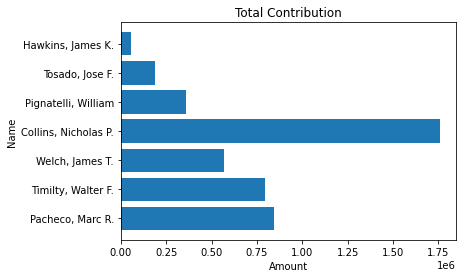

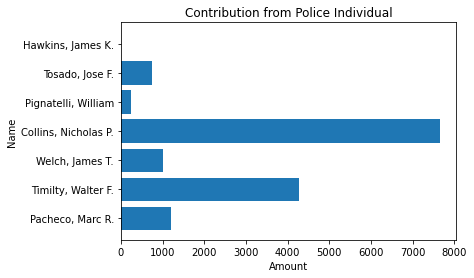

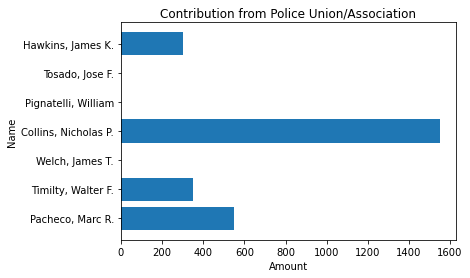

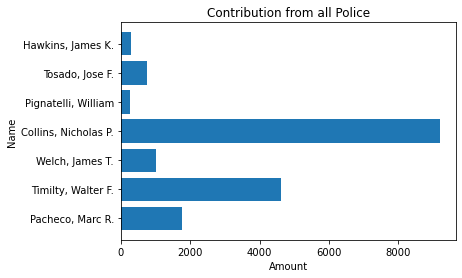

In [39]:
fig, ax = plt.subplots()
b = ax.barh(range(len(dict21)), dict21.values())
ax.set_yticks(range(len(dict21)))
ax.set_yticklabels(dict0[k] for k in dict21.keys())
plt.title("Total Contribution")
plt.xlabel("Amount")
plt.ylabel("Name")
plt.show()

fig, ax = plt.subplots()
b = ax.barh(range(len(dict22)), dict22.values())
ax.set_yticks(range(len(dict22)))
ax.set_yticklabels(dict0[k] for k in dict22.keys())
plt.title("Contribution from Police Individual")
plt.xlabel("Amount")
plt.ylabel("Name")
plt.show()

fig, ax = plt.subplots()
b = ax.barh(range(len(dict23)), dict23.values())
ax.set_yticks(range(len(dict23)))
ax.set_yticklabels(dict0[k] for k in dict23.keys())
plt.title("Contribution from Police Union/Association")
plt.xlabel("Amount")
plt.ylabel("Name")
plt.show()

fig, ax = plt.subplots()
b = ax.barh(range(len(dict24)), dict24.values())
ax.set_yticks(range(len(dict24)))
ax.set_yticklabels(dict0[k] for k in dict24.keys())
plt.title("Contribution from all Police")
plt.xlabel("Amount")
plt.ylabel("Name")
plt.show()

In [41]:
### Metrics

print('Average YES to NO - Total: ' + str((dict21[11448] + dict21[13294] + dict21[14191] + dict21[12730] + dict21[13785]) / 5))
print('Average NO to YES - Total: ' + str((dict21[15084] + dict21[16878]) / 2))
print('Average YES to NO - Police: ' + str((dict24[11448] + dict24[13294] + dict24[14191] + dict24[12730] + dict24[13785]) / 5))
print('Average NO to YES - Police: ' + str((dict24[15084] + dict24[16878]) / 2))
print('Percentage YES to NO - Police: ' + str((dict24[11448] + dict24[13294] + dict24[14191] + dict24[12730] + dict24[13785]) / \
                                              (dict21[11448] + dict21[13294] + dict21[14191] + dict21[12730] + dict21[13785])))
print('Percentage NO to YES - Police: ' + str((dict24[15084] + dict24[16878]) / (dict21[15084] + dict21[16878])))

Average YES to NO - Total: 548886.118
Average NO to YES - Total: 906170.6900000005
Average YES to NO - Police: 1675.0
Average NO to YES - Police: 4750.0
Percentage YES to NO - Police: 0.003051634838394656
Percentage NO to YES - Police: 0.00524183804709022


In [17]:
### Count contribution they've received by time

for ls in list4:
    for i, row in df4.iterrows():
        if row["CPF ID"] == ls:
            print(row["Recipient"] + ": " + str(row["Amount"]) + " from " + row["Contributor"] + " at " + row["Date"])
    print()

Pacheco, Marc R.: 200.0 from Spencer, Jr., Manuel at 10/29/2010
Pacheco, Marc R.: 1000.0 from Greene, Jr, Bernard E at 12/19/2017
Pacheco, Marc R.: 100.0 from Massachusetts Coalition of Police AFL-CIO I.U.P.A. at 10/17/2010
Pacheco, Marc R.: 200.0 from Massachusetts Coalition of Police AFL-CIO I.U.P.A. at 11/10/2011
Pacheco, Marc R.: 250.0 from Massachusetts Coalition of Police AFL-CIO I.U.P.A. at 11/15/2013

Timilty, Walter F.: 250.0 from Tobin, Michael at 8/12/2010
Timilty, Walter F.: 100.0 from Collins, Michael A. at 12/7/2011
Timilty, Walter F.: 150.0 from Sullivan, Jr., Arthur M. at 5/11/2012
Timilty, Walter F.: 100.0 from Collins, Michael A. at 12/31/2015
Timilty, Walter F.: 500.0 from Pace, William F. at 4/29/2016
Timilty, Walter F.: 250.0 from Kane, Patrick at 5/8/2016
Timilty, Walter F.: 100.0 from Collins, Michael A. at 5/20/2016
Timilty, Walter F.: 100.0 from Pace, William F. at 5/20/2016
Timilty, Walter F.: 200.0 from Pullman, Dana at 7/5/2016
Timilty, Walter F.: 200.0 from